## Perform dictionary learning (and atom extraction) from the MNIST dataset
 * Dictionary learning finds atoms to form a sparse representation of input data
 * Complex input can be seen as a sparse combination of primitive components.
 * MNIST digits can be seen as a sparse combination of all possible ink strokes.

In [27]:
import matplotlib.pyplot as plt

### Load, Explore and Pre-process Data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [28]:
from sklearn.datasets import load_digits

digits = load_digits()

## Explore Data

In [29]:
digits.data.shape

(1797, 64)

This process can be very long on low-end machines. In such a case,
limit the number of samples to 20 or 30.

In [30]:
sample = digits.data[:40,:]

In [31]:
sample.shape

(40, 64)

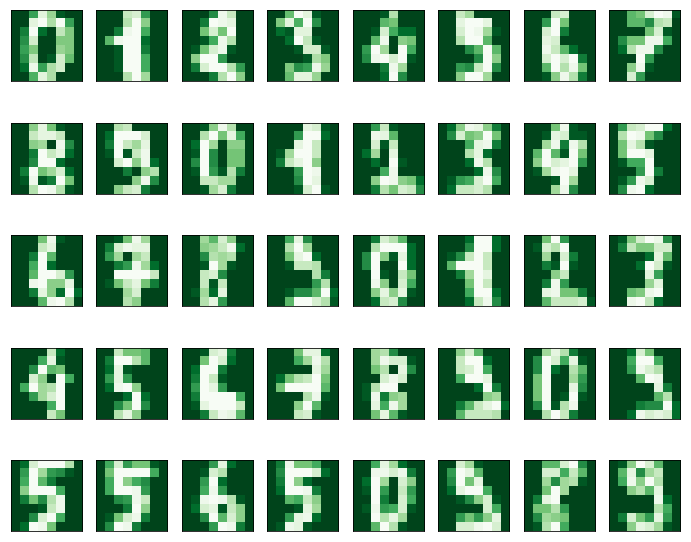

In [32]:
fig = plt.figure(figsize = (12, 10))  

for i in range(40):
    
    ax = fig.add_subplot(5, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(sample[i].reshape(8, 8), cmap = 'Greens_r',interpolation = 'nearest')

## DictionaryLearning
* Finds a dictionary (a set of atoms) that can best be used to represent data using a sparse code.
* n_components : number of dictionary elements to extract
* fit_algorithm : lars uses the least angle regression method to solve the lasso problem 
* transform_algorithm : Algorithm used to transform the data lars: uses the least angle regression method 
* lasso_lars: uses Lars to compute the Lasso solution

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.DictionaryLearning.html

In [33]:
from sklearn.decomposition import DictionaryLearning

dict_learn = DictionaryLearning(n_components = 36, fit_algorithm = 'lars', transform_algorithm = 'lasso_lars')

## fit_transform
Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

In [34]:
X_dict = dict_learn.fit_transform(sample)

In [35]:
X_dict.shape

(40, 36)

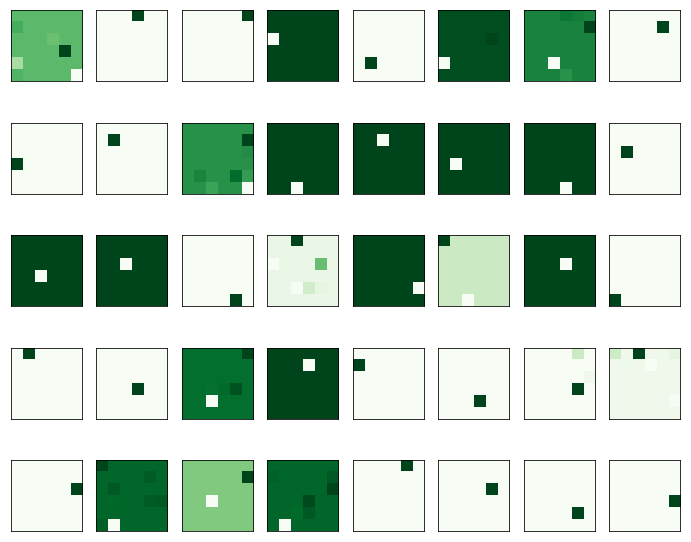

In [36]:
fig = plt.figure(figsize=(12, 10))  

for i in range(40):

    ax = fig.add_subplot(5, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(X_dict[i].reshape(6, 6), cmap = 'Greens_r',interpolation = 'nearest')

## Recreate features from atoms

components_ : array, [n_components, n_features] - dictionary atoms extracted from the data

In [37]:
dict_learn.components_.shape

(36, 64)

In [38]:
X_dict.shape

(40, 36)

In [39]:
import numpy as np

original = np.matmul(X_dict, dict_learn.components_)

In [40]:
original.shape

(40, 64)

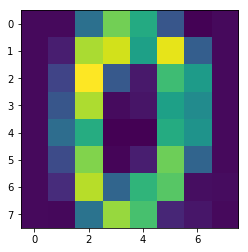

In [42]:
plt.imshow(original[0].reshape(8, 8))

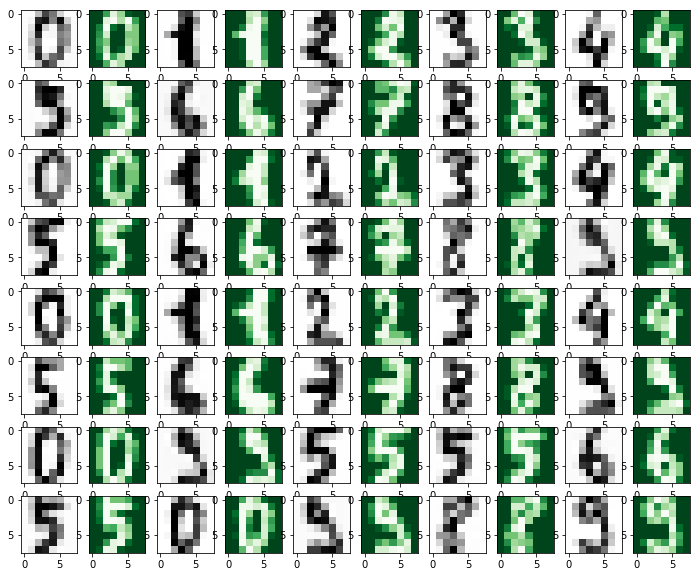

In [43]:
fig = plt.figure(figsize = (12, 10))  
a = 0
b = 0

for i in range(80):
    
    if i%2==0:
        ax = plt.subplot(8, 10, i+1 )
        ax.imshow(original[a].reshape(8, 8), cmap = 'Greys')
        a+=1
    else:
        ax = plt.subplot(8, 10, i+1 )
        ax.imshow(sample[b].reshape(8, 8), cmap = 'Greens_r')
        b+=1